# General scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic3

In [4]:
#Concatenar files desde Jupyter
'''
xd0 = pd.read_csv('general-scan.csv')
#File got with nohup
xdnew = pd.read_csv('xd_scan-general-6.csv')

xd = pd.concat([xd0, xdnew],ignore_index=True)
del xd['Unnamed: 0']

print(xd0.shape,xdnew.shape,xd.shape)

#save file
xd.to_csv('general-scan.csv')
'''

"\nxd0 = pd.read_csv('general-scan.csv')\n#File got with nohup\nxdnew = pd.read_csv('xd_scan-general-6.csv')\n\nxd = pd.concat([xd0, xdnew],ignore_index=True)\ndel xd['Unnamed: 0']\n\nprint(xd0.shape,xdnew.shape,xd.shape)\n\n#save file\nxd.to_csv('general-scan.csv')\n"

In [4]:
xd = pd.read_csv('general-scan.csv')
del xd['Unnamed: 0']

In [5]:
xd.shape

(8834, 59)

In [7]:
8834-xd.shape[0]

0

In [8]:
xd.mChi1.max()

2957.0428499999998

# Removing the higgses with $m_{hi} < 125$

In [9]:
xd.mh2.min()

124.85914099999999

In [10]:
xd = xd[np.logical_and(xd.mh1 >= 124.5 , xd.mh2 >= 124.5)]

In [11]:
print(xd.shape[0],xd.mh1.min(),xd.mh1.max(),xd.mh2.min(),xd.mh2.max())

6991 124.501633 124.861947 125.357892 137045.151


### Removing YRC, LSP, LSPH >3

In [12]:
s1 = xd[np.logical_and(np.abs(xd.YRC) < 3. , np.abs(xd.LamSP) < 3.)]
xd = s1[np.logical_and(np.abs(s1.LamSPH) < 3. , 0. < 1.)]

In [13]:
print(xd.shape, s1.shape)

(6131, 59) (6131, 59)


# Analytical diagonalization rutine for Neutrino mass matriz

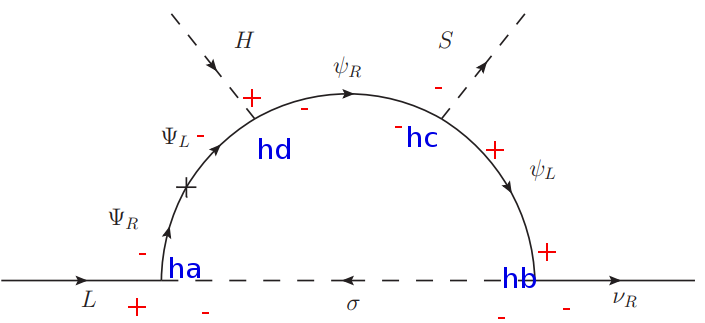

In [14]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [15]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [16]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
2,3.669953e-19,4.336809e-19,8.950439e-12,8.950438e-12,4.981227e-11,4.981237e-11
4,2.810458e-19,4.336809e-19,8.813628e-12,8.813473e-12,4.910643e-11,4.910646e-11
5,3.687184e-19,4.336809e-19,8.957013e-12,8.957013e-12,4.990374e-11,4.990376e-11


# PLOTS

In [17]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

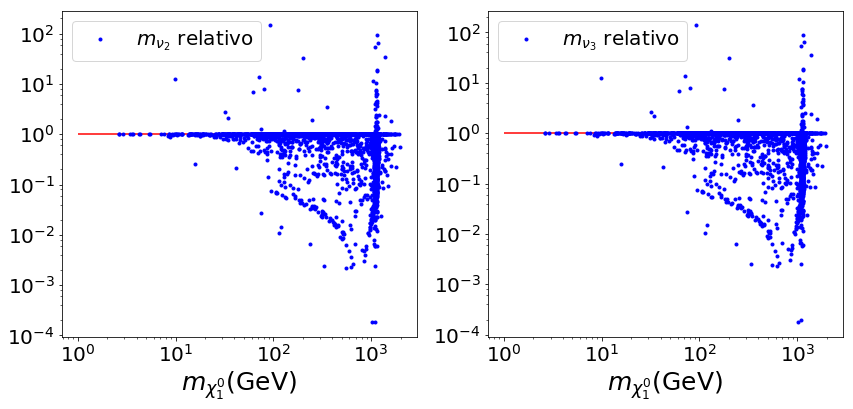

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.subplot(122)
plt.loglog(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.show()

filter the good points

In [19]:
xd1 = xd[np.logical_and(xd.mv2/xd.mn2 <1.1, xd.mv2/xd.mn2 >0.9)]
xd2 = xd1[np.logical_and(xd1.mv3/xd1.mn3 <1.1, xd1.mv3/xd1.mn3 >0.9)]
xd = xd2

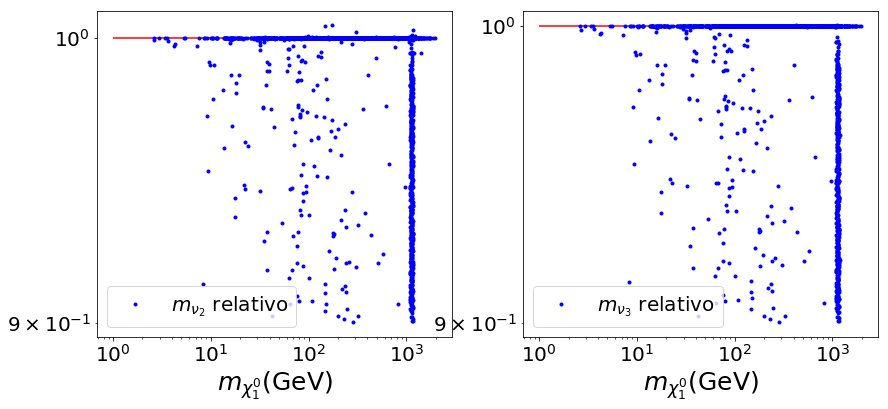

In [20]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.subplot(122)
plt.loglog(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.show()

In [21]:
#Experimental values for DM: Latest Planck results 2018
### WARNING 
e = 5
Omega = 0.120
Omega_min=Omega - e*0.001
Omega_max=Omega + e*0.001
print( Omega_min, Omega,Omega_max)

0.11499999999999999 0.12 0.125


DM cut

In [22]:
xDM = xd[np.logical_and(xd.Omega>Omega_min, xd.Omega < Omega_max)]
print(xd.shape[0], xDM.shape[0])

3345 1989


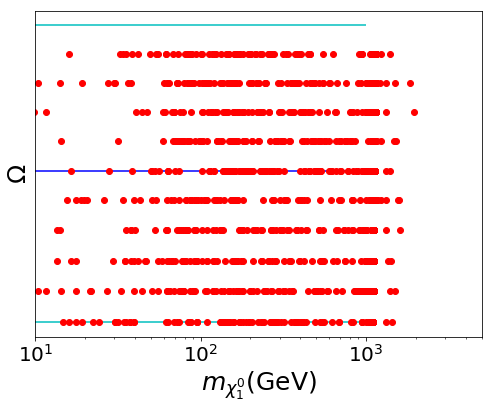

In [23]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mChi1,xd.Omega,'b.')
plt.loglog(xDM.mChi1,xDM.Omega,'ro')
plt.hlines(Omega_max,1,1e3, 'c',label=r'')
plt.hlines(Omega_min,1,1e3, 'c',label=r'')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
plt.xlim(10,5e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

cuts

Maximun values: Some elements tend to be small

In [24]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

113.352197461 486.560783532 442.646805956
65.8052159092 151.116684395 183.263061129


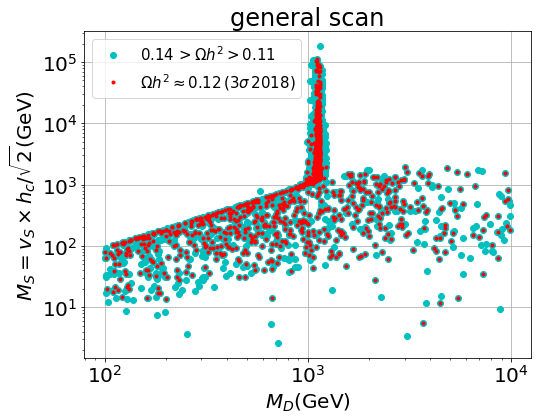

In [25]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'co',label=r'$0.14\,> \Omega h^2 > 0.11$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'r.',label=r'$\Omega h^2 \approx 0.12\, (3\sigma\, 2018)$')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_S=v_S \times h_c /\sqrt{2}$(GeV)',size=20)

#plt.ylim(5,2e3)

plt.show()

# Experimental Constrainsts after the relic density cut

In [26]:
from indirectdirect import *

# $\sigma_{SI}$ and Sigma v: $\langle\sigma v \rangle$

Import DD constraints

In [27]:
from scipy import interpolate

#Importar un txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects
names1 = ['MDM', 'LZ']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ.txt')
dd1 = pd.DataFrame(a, columns=names1)

LZSI=interpolate.interp1d(dd1.MDM,dd1.LZ)

#Importar Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

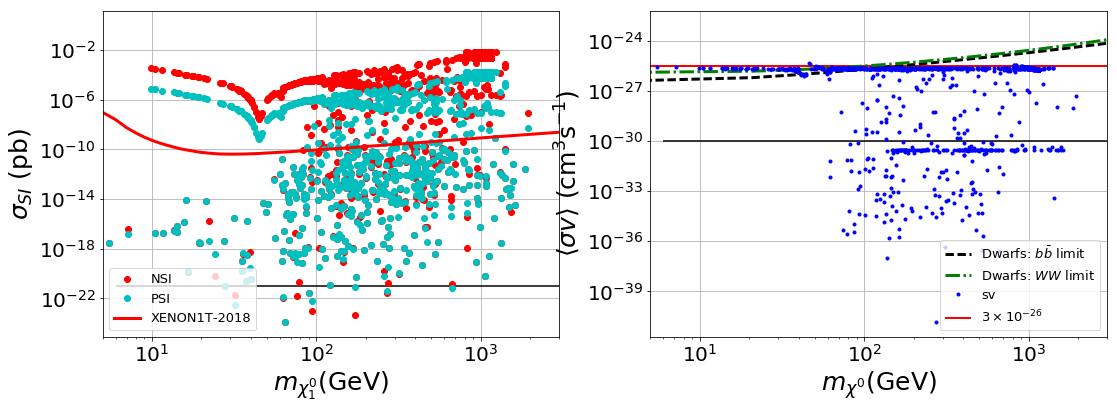

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.loglog(xDM.mChi1, xDM.NSI, 'ro')
plt.plot(xDM.mChi1, xDM.PSI, 'co')
#plt.loglog(xd.mChi1, xd.PSI, 'c.')
#plt.loglog(xd.mChi1, xd.NSI, 'g.')
plt.legend()

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')
plt.hlines(1e-21,6,5e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.xlim(5,3e3)

plt.subplot(122)
plt.hlines(3e-26,0.1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.loglog(xDM.mChi1, xDM.sv , 'b.')
plt.hlines(1e-30,6,5e3)
plt.legend(prop={'size':13},loc='lower right')
plt.grid()

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.xlim(1,3e3)
#plt.ylim(1e-35,1e-24)
plt.xlim(5,3e3)
plt.show()

# Analytic expression: $\sigma_{SI}$

### Scalar interaction with the Higss

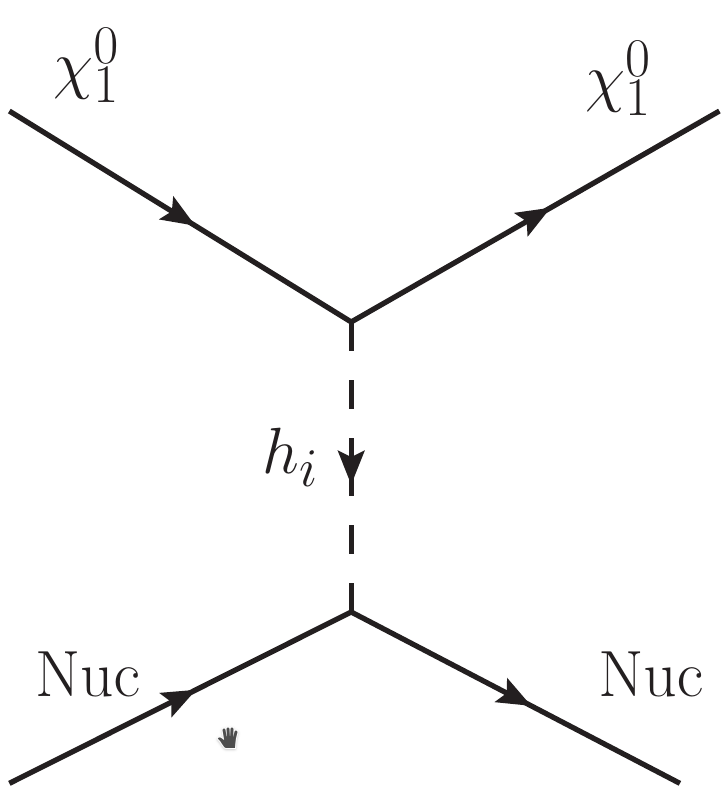

In [29]:
from IPython.display import Image
Image("SI-mass-basis.png", width=200)

In [30]:
#Parameters
fN = 0.25
#SARAH
#v = 244.874425
v = 246.
#nucleon mass in GeV (proton)
MNp = 938.27*1.e-3
#939.5 (neutron mass)
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

http://www.saha.ac.in/theory/palashbaran.pal/conv.html

In [31]:
#Reset index to imput new data to the dataframe
xDM = xDM.reset_index()
del[xDM['index']]


\begin{equation}
C_{\chi_1\chi_1 h_k} = C_{11k} = \dfrac{-i}{\sqrt{2}}U_{12}\left(h_cV_{12}Z^H_{k2}+h_dV_{11}Z^H_{k1}\right)
\end{equation}

In [32]:
#Add vertices to the dataframe
xDM['cxxh1'] = (xDM.YRC*xDM.XV21*xDM.ZH12 + xDM.YRD*xDM.XV11*xDM.ZH11)*(xDM.XU12/np.sqrt(2.))
xDM['cxxh2'] = (xDM.YRC*xDM.XV12*xDM.ZH22 + xDM.YRD*xDM.XV11*xDM.ZH21)*(xDM.XU12/np.sqrt(2.))

\begin{equation}
\sigma_{SI} = 
\dfrac{m_r^2}{\pi}\left(\dfrac{(f_N) m_N}{v_{\text{SM}}}\right)^2
\left(\dfrac{C_{111}Z^H_{11}}{mh_1^2} + \dfrac{C_{112}Z^H_{21}}{mh_2^2} \right)^2
\end{equation}

In [33]:
xDM['mr'] = MNp*xDM.mChi1/(MNp+xDM.mChi1)

In [34]:
xDM['PSI_scalar'] = (1./1.)*(xDM.mr**2/np.pi)*(MNp*fN/v)**2*( xDM.cxxh1*xDM.ZH11/(xDM.mh1**2) + xDM.cxxh2*xDM.ZH21/(xDM.mh2)**2 )**2*GeVtomin2topb

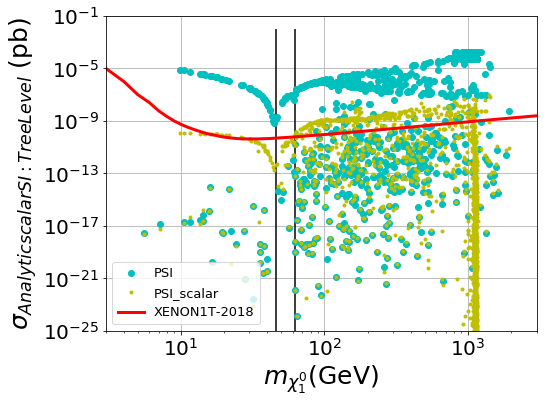

In [35]:
plt.figure(figsize=(8,6))

plt.loglog(xDM.mChi1, xDM.PSI, 'co')
plt.loglog(xDM.mChi1, xDM.PSI_scalar, 'y.')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{Analytic scalar SI: Tree Level} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.vlines(91.187/2., 1e-34,1e-2)
plt.vlines(125./2., 1e-34,1e-2)
plt.ylim(1e-25,1e-1)
plt.xlim(3,3e3)
plt.tight_layout()

(20, 1000.0)

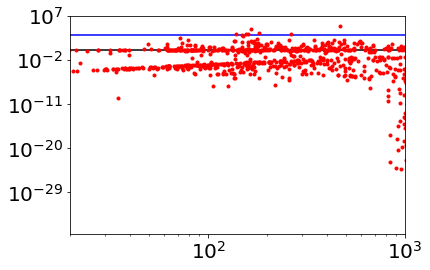

In [36]:
plt.loglog(xDM.mChi1, xDM.PSI_scalar/xDM.PSI,'r.')
plt.hlines(1,10,1e4)
plt.hlines(11e2,10,1e4,'b')
plt.xlim(20,1e3)

warning!

### $\sigma_{SI}$ from vector interaction with $Z$

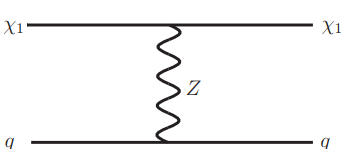

In [37]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{equation}
\sigma_{SI}^{A,Z} = \color{red}{\dfrac{1}{16}} \dfrac{G_F^2 \mu^2}{8\pi}(\cos^2{\theta_L}+\cos^2{\theta_R})^2
\left[(1-4\sin^2\theta_W )Z-(A-Z)\right]^2
\end{equation}

https://arxiv.org/abs/1510.06151

Take care that my rotation is diferent

In [38]:
# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MZ      = 91.187
#MW      = 80.385

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

\begin{equation}
\sigma_{SI}^{N} = \dfrac{m_N^2}{\mu^2 A^2}\sigma_{SI}^{A,Z}
\end{equation}

In [39]:
#For the Proton
xDM['PSI_vector'] = (1./16.)*GF**2*MNp**2/(8.*np.pi*A**2)*(xDM.XV11**2+xDM.XU11**2)**2*((1.-4.*(1.- (MW/MZ)**2))*Z-(A-Z))**2*GeVtomin2topb

In [40]:
GF

1.16637e-05

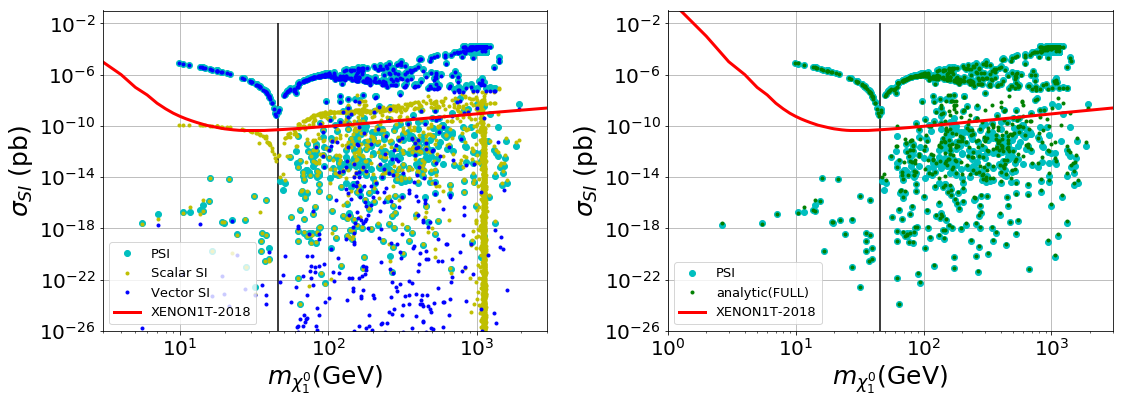

In [41]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.loglog(xDM.mChi1, xDM.PSI, 'co')
plt.loglog(xDM.mChi1, xDM.PSI_scalar, 'y.',label='Scalar SI')
plt.loglog(xDM.mChi1, xDM.PSI_vector, 'b.',label='Vector SI')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.vlines(MZ/2, 1e-34,1e-2)
plt.xlim(3,3e3)
plt.ylim(1e-26,1e-1)

plt.subplot(1,2,2)
plt.loglog(xDM.mChi1, xDM.PSI, 'co')
#plt.loglog(xDM.mChi1, (xDM.PSI_scalar + xDM.PSI_vector), 'm.',label='analytic(Vector SI + scalar SI)')
plt.loglog(xDM.mChi1, (xDM.PSI_scalar + xDM.PSI_vector + 2.*np.sqrt(xDM.PSI_scalar*xDM.PSI_vector)), 'g.',label='analytic(FULL)')
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.vlines(MZ/2, 1e-34,1e-2)
plt.ylim(1e-26,1e-1)
plt.xlim(1,3e3)
plt.tight_layout()

In conclusion: the vector SI interaction could dominate and could exclude the model. We need to suppress this interaction, it means, that the DM needs to be singlet and the relic density is obtained by coannihilations. However, we realize that for hight mass region the scalar interaction is important. Yaguna elude (dodge) this assuming Yukawas $< 10^{-3}$

Points with low doublet component

In [42]:
print(np.abs(xDM.YRC).min(),np.abs(xDM.YRD).min())

0.00120012088244 1.00426235181e-06


In [43]:
# Only scalarSI 
k = xDM[np.logical_and(np.abs(xDM.XU11)< 1e-6, 1 >0)]
# Only vectorSI
#k = xDM[np.logical_and(np.abs(xDM.YRC)< 1e-2, np.abs(xDM.YRD)< 1e-4)]

k.shape

(60, 67)

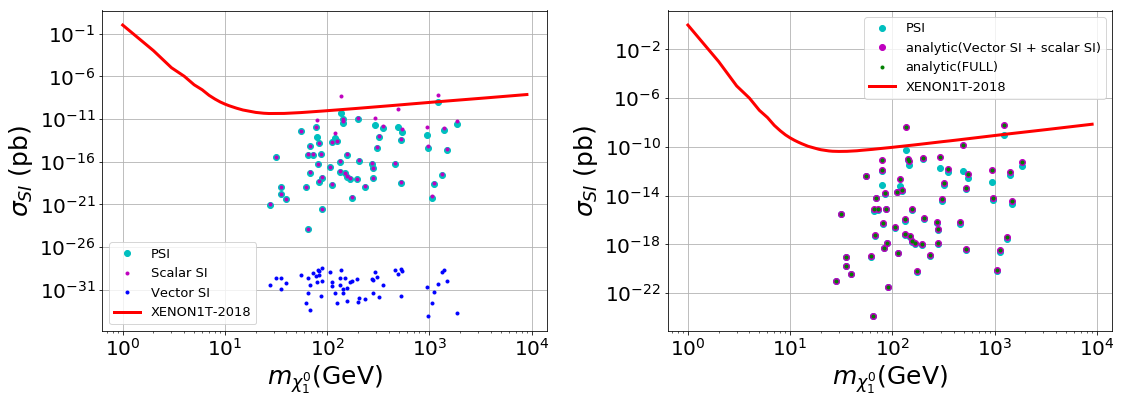

In [44]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.loglog(k.mChi1, k.PSI, 'co')
plt.loglog(k.mChi1, k.PSI_scalar, 'm.',label='Scalar SI')
plt.loglog(k.mChi1, k.PSI_vector, 'b.',label='Vector SI')
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()

plt.subplot(1,2,2)
plt.loglog(k.mChi1, k.PSI, 'co')
plt.loglog(k.mChi1, (k.PSI_scalar + k.PSI_vector), 'mo',label='analytic(Vector SI + scalar SI)')
plt.loglog(k.mChi1, (k.PSI_scalar + k.PSI_vector + 2.*np.sqrt(k.PSI_scalar*k.PSI_vector)), 'g.',label='analytic(FULL)')
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='best')
plt.grid()
plt.tight_layout()

# $\sigma_{SD}$

In [45]:
from scipy import interpolate

#Importar un txt
namesLZSD = ['MDM', 'LZSD']
lz = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ_SD_neutrons_expectation.dat')
xdlz = pd.DataFrame(lz, columns=namesLZSD)
LZSD=interpolate.interp1d(xdlz.MDM,xdlz.LZSD)

names = ['MDM', 'XENON1TSD']
xeSD=np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/Xenon1T_SDneutrons_expectations.dat')
xdxeSD = pd.DataFrame(xeSD, columns=names)
XENON1TSD=interpolate.interp1d(xdxeSD.MDM,xdxeSD.XENON1TSD)

In [46]:
#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX SD protons and neutrons http://arxiv.org/pdf/1602.03489.pdf
LUX_sd = ['M', 'sigmaSD']
datosneutrons = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX_SD_neutrons.dat')
LUX_SD_n = pd.DataFrame(datosneutrons, columns=LUX_sd)

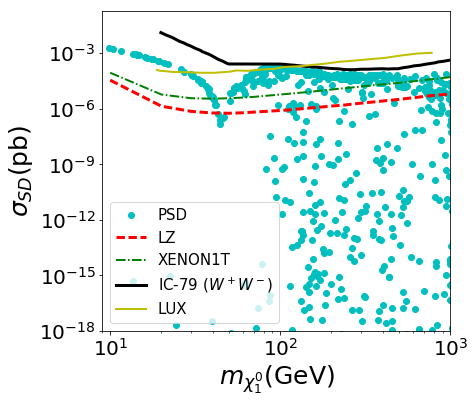

In [47]:
plt.figure(figsize=(7,6))

plt.loglog(xDM.mChi1,xDM['PSD'],'co')
#plt.loglog(xDM.mChi1,xDM['NSD'],'r.')

#Prospects
n=np.arange(10,5000,10)
plt.loglog(n,LZSD(n),'r--',lw=3,label='LZ')
plt.loglog(n,XENON1TSD(n),'g-.',lw=2,label='XENON1T')

#plt.plot(PICO2L_SD['M'],PICO2L_SD['sigmaSD']*(1E+36),'lime',lw=2,label='PICO-2L (proton)')
#plt.plot(PICO60_SD['M'],PICO60_SD['sigmaSD']*(1e+36),'y-',lw=2,label='PICO-60 (proton)')
#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=3,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
plt.plot(LUX_SD_n['M'],LUX_SD_n['sigmaSD']*(1e+36),'y',lw=2,label='LUX')

#plt.title(r'Preliminary: Without LFV')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SD}$(pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(9,1.0e3)
plt.ylim(1e-18,2e-1)

plt.tight_layout()
plt.savefig('plots/SD.pdf')
#plt.show()

# Good points

In [48]:
## Reset index to imput new data to the dataframe
xDM = xDM.reset_index()
del[xDM['index']]

In [49]:
## Compute the XENON1T limit for Chi1 as a DM particle 
y = XENON1T(xDM.mChi1)*1e+36
yd = pd.DataFrame(y,columns=['Xenon1T_SI'])

In [50]:
from indirectdirect import *

In [51]:
## Add to the original Dataframe
xDM['Xenon1T_SI'] = yd['Xenon1T_SI']
## It was easy because sigma_bb gives a list
xDM['Dwarfs_bb_sv'] = sigmav_bb_fit(xDM.mChi1)

In [52]:
## Only points with SI passing XENON1T for neutron and protons
k2 = xDM[np.logical_and(xDM.PSI < xDM.Xenon1T_SI , xDM.NSI < xDM.Xenon1T_SI)]
k3 = k2[np.logical_and(k2.PSI_scalar < k2.Xenon1T_SI , k2.PSI_vector < k2.Xenon1T_SI)]

DI = k3[np.logical_and(k3.sv < k3.Dwarfs_bb_sv , 0. < 1.)]

In [53]:
DI.shape

(278, 69)

### Coannihilation

In [54]:
coan = DI[np.logical_and(np.abs(DI.mChi1-DI.mChi2)<20. , 1 >0)]

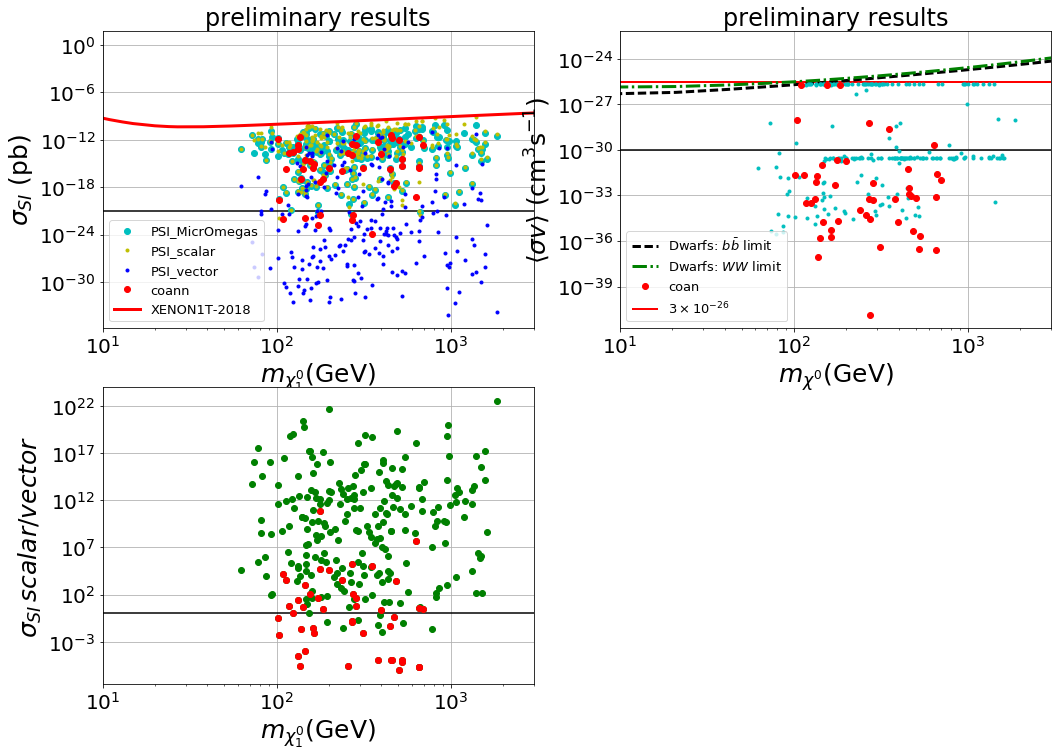

In [55]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.loglog(DI.mChi1, DI.PSI, 'co',label='PSI_MicrOmegas')
#plt.loglog(DI.mChi1, (DI.PSI_scalar + DI.PSI_vector), 'mo',label='analytic(Vector SI + scalar SI)')
plt.loglog(DI.mChi1, DI.PSI_scalar , 'y.')
plt.loglog(DI.mChi1, DI.PSI_vector , 'b.')
plt.plot(coan.mChi1, coan.PSI_vector , 'ro',label='coann')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')
plt.hlines(1e-21,6,5e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.xlim(1e1,3e3)
plt.title('preliminary results')

plt.subplot(222)
plt.hlines(3e-26,1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.loglog(DI.mChi1, DI.sv , 'c.',label='')
plt.loglog(coan.mChi1, coan.sv , 'ro',label='coan')
plt.hlines(1e-30,6,5e3)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.title('preliminary results')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.xlim(1e1,3e3)
#plt.ylim(1e-35,1e-24)

plt.subplot(223)
plt.loglog(DI.mChi1, DI.PSI_scalar/DI.PSI_vector , 'go',label='')
plt.loglog(coan.mChi1, coan.PSI_scalar/coan.PSI_vector , 'ro',label='')
plt.hlines(1.,1e1,3e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI}\, scalar/vector $',size=25)
plt.grid()
plt.xlim(1e1,3e3)

plt.show()

The scalar interaction is bigger. We can reduced it because we have neutrino masses

### Complet Mixing plot

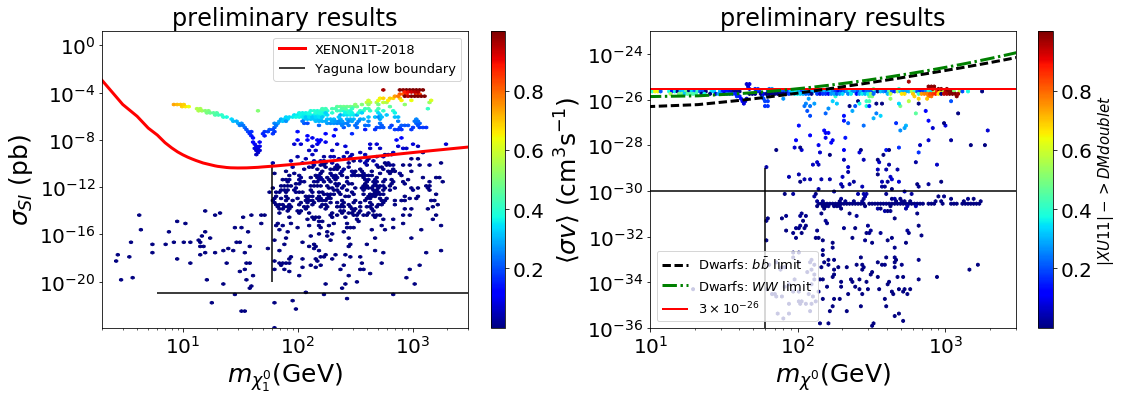

In [56]:
plt.figure(figsize=(18,12))

plt.subplot(221)
#plt.loglog(DI.mChi1, DI.NSI, 'g.')
plt.hexbin(xd.mChi1, xd.PSI, np.abs(xd.XU11) ,xscale='log',yscale='log',gridsize=100,label='',cmap='jet' )
a=plt.colorbar()
#a.set_label(r'$|XU11|-> DM doublet$',size=15)

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')
plt.hlines(1e-21,6,5e3,label='Yaguna low boundary')
plt.vlines(60, 1e-20,1e-10)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='best')
#plt.grid()
plt.xlim(2,3e3)
plt.title('preliminary results')

plt.subplot(222)
plt.hlines(3e-26,1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.hexbin(xd.mChi1, xd.sv, np.abs(xd.XU11) ,xscale='log',yscale='log',gridsize=150,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$|XU11|-> DM doublet$',size=15)
plt.hlines(1e-30,6,5e3)
plt.vlines(60, 1e-39,1e-29)
plt.legend(prop={'size':13},loc='best')
#plt.grid()
plt.title('preliminary results')
plt.xlim(1e1,3e3)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.ylim(1e-36,1e-23)

plt.show()

WARNING: The doublet component is low -> DM is singlet but with the relic density and without coannhilations ??? 

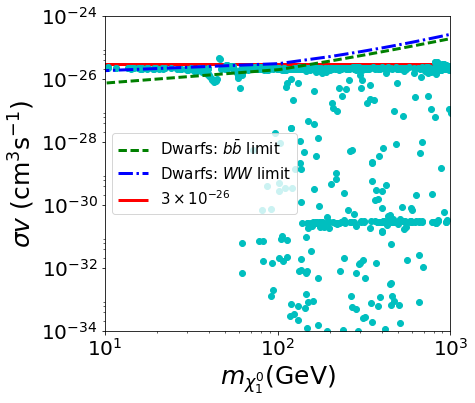

In [57]:
plt.figure(figsize=(7,6))

plt.loglog(xDM.mChi1, xDM.sv,'co',label='')

plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.semilogy(m,sigmav_bb_fit(m),'g--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'b-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.legend(prop={'size':15},loc='best')
plt.xlim(1e1,1e3)
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma v $ $($cm$^{3} $s$^{-1})$',size=25)
plt.ylim(1e-34,1e-24)

plt.tight_layout()
plt.savefig('plots/sv.pdf')
#plt.show()

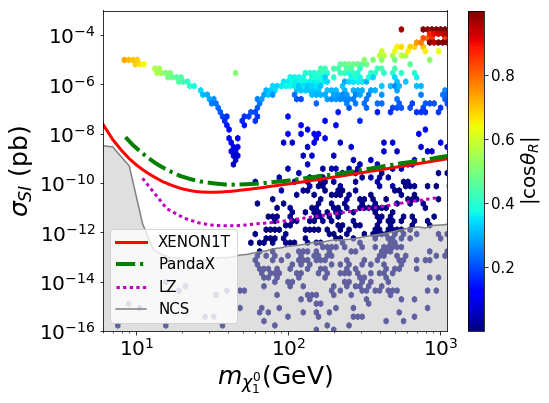

In [58]:
plt.figure(figsize=(8,6))

#plt.loglog(DI.mChi1, DI.NSI, 'g.')
plt.hexbin(xd.mChi1, xd.PSI, np.abs(xd.XU11) ,xscale='log',yscale='log',gridsize=100,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$|\cos\theta_R|$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,'g-.',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'m:',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-18,back,facecolor='silver',alpha=0.5)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(6,1.1e3)
plt.ylim(1e-16,1e-3)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
#plt.show()

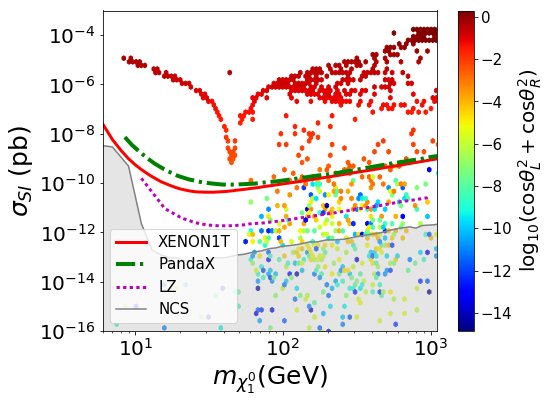

In [59]:
plt.figure(figsize=(8,6))

#plt.hexbin(xDM.mChi1, xDM.PSI, np.log10(xDM.XU11**2+xDM.XV11**2) ,xscale='log',yscale='log',gridsize=120,label='',cmap='jet' )
plt.hexbin(xd.mChi1, xd.PSI, np.log10(xd.XU11**2+xd.XV11**2) ,xscale='log',yscale='log',gridsize=120,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(\cos\theta_L^2+\cos\theta_R^2)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,'g-.',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'m:',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-33,back,facecolor='silver',alpha=0.4)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(6,1.1e3)
plt.ylim(1e-16,1e-3)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
#plt.show()

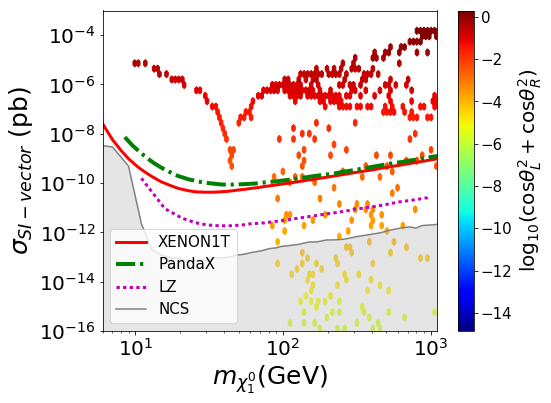

In [60]:
plt.figure(figsize=(8,6))

#plt.loglog(DI.mChi1, DI.NSI, 'g.')
plt.hexbin(xDM.mChi1, xDM.PSI_vector, np.log10(xDM.XU11**2+xDM.XV11**2) ,xscale='log',yscale='log',gridsize=120,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(\cos\theta_L^2+\cos\theta_R^2)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,'g-.',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'m:',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-33,back,facecolor='silver',alpha=0.4)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI-vector} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(6,1.1e3)
plt.ylim(1e-16,1e-3)

plt.tight_layout()
#plt.savefig('plots/SI-vector.pdf')
#plt.show()

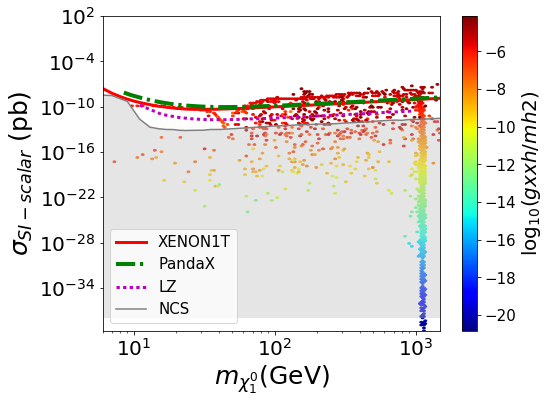

In [61]:
plt.figure(figsize=(8,6))

#plt.loglog(DI.mChi1, DI.NSI, 'g.')
plt.hexbin(xDM.mChi1, xDM.PSI_scalar, np.log10(np.abs(xDM.cxxh1/xDM.mh1**2 + xDM.cxxh2/xDM.mh2**2)),\
           xscale='log',yscale='log',gridsize=150,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$\log_{10}(gxxh/mh2)$',size=20)
ticklabs = a.ax.get_yticklabels()
a.ax.set_yticklabels(ticklabs, fontsize=15)

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,'g-.',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'m:',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='silver',alpha=0.4)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI-scalar} $ (pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(6,1.5e3)
#plt.ylim(1e-18,1e-6)

plt.tight_layout()
#plt.savefig('plots/SI-scalar.pdf')
#plt.show()

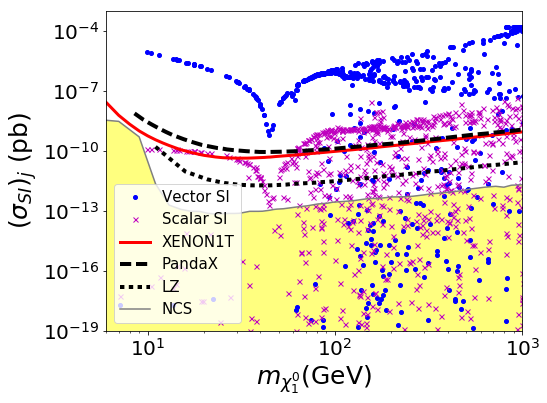

In [69]:
plt.figure(figsize=(8,6))

#plt.loglog(xDM.mChi1, xDM.PSI, 'co',ms=8,label=r'Full $\sigma_{SI}$')
plt.loglog(xDM.mChi1, xDM.PSI_vector, 'b.',ms=8,label='Vector SI')
plt.loglog(xDM.mChi1, xDM.PSI_scalar, 'mx',ms=5,label='Scalar SI')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T')

#plot pandaX data
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX')

#plt LZ
n=np.linspace(11,980,200)
plt.semilogy(n,LZSI(n)*1e+36,'k:',lw=4,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5)

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$(\sigma_{SI})_j$ (pb)',size=25)
plt.legend(prop={'size':15},loc='best')
plt.xlim(6,1.0e3)
plt.ylim(1e-19,1e-3)

plt.tight_layout()
plt.savefig('plots/SI.pdf')
#plt.show()

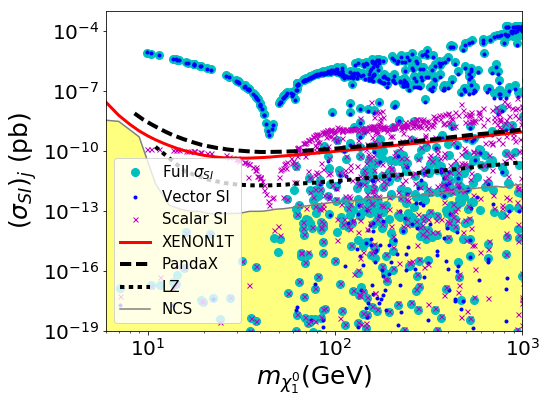

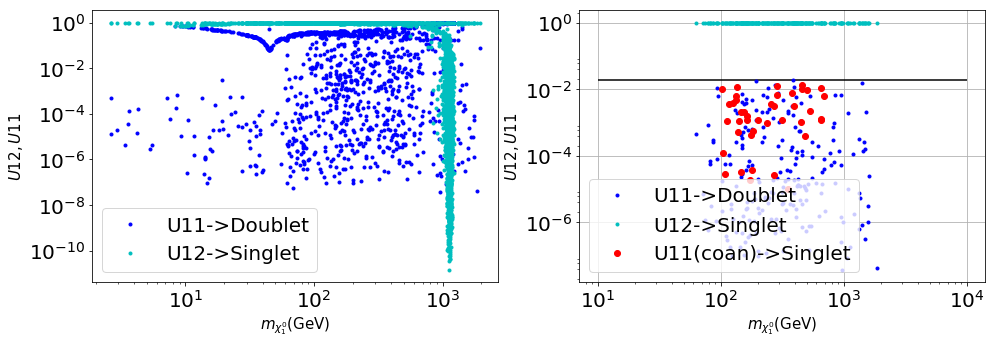

In [64]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.loglog(xd.mChi1, np.abs(xd.XU11),'b.',label='U11->Doublet') 
plt.loglog(xd.mChi1, np.abs(xd.XU12),'c.',label='U12->Singlet') 
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=15)
plt.ylabel(r'$U12,U11$',size=15)
plt.legend()

plt.subplot(122)
plt.loglog(DI.mChi1, np.abs(DI.XU11),'b.',label='U11->Doublet') 
plt.loglog(DI.mChi1, np.abs(DI.XU12),'c.',label='U12->Singlet') 
plt.loglog(coan.mChi1, np.abs(coan.XU11),'ro',label='U11(coan)->Singlet') 
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=15)
plt.ylabel(r'$U12,U11$',size=15)
plt.hlines(DI.XU11.max(), 10, 1e4)
plt.legend()
plt.grid()

plt.show()

maximum value of $XU11$ , $XV11$ ~ doublet component of DM

In [65]:
print(DI.XU11.max(),DI.XV11.max())

0.0184927295 0.0130150309


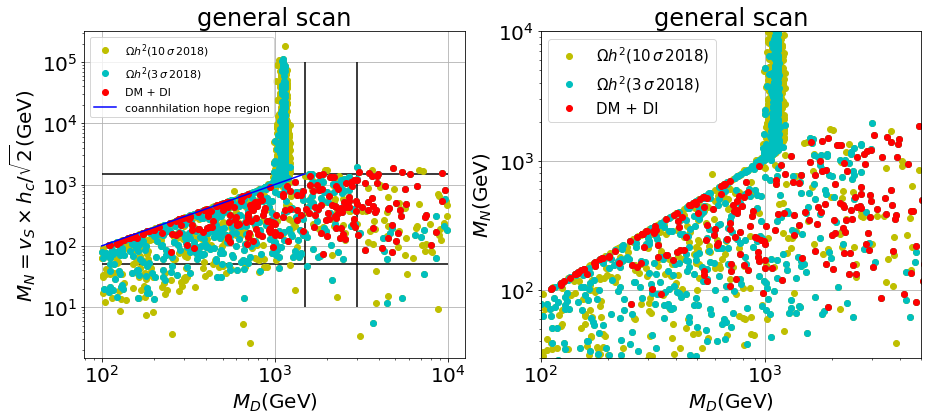

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'yo',label=r'$\Omega h^2 ( 10\,\sigma\, 2018)$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',label=r'$\Omega h^2 ( 3\,\sigma\, 2018)$')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label='DM + DI')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=20)
m = np.linspace(1e2,1.5e3,20)
plt.plot(m, m, 'b-',label='coannhilation hope region')
plt.legend(prop={'size':11},loc='best')
plt.hlines(1.5e3,1e2,1e4)
plt.hlines(50,1e2,1e4)
plt.vlines(1.5e3,1e1,1e5)
plt.vlines(3e3,1e1,1e5)

plt.subplot(122)
plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'yo',label=r'$\Omega h^2 ( 10\,\sigma\, 2018)$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',label=r'$\Omega h^2 ( 3\,\sigma\, 2018)$')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label='DM + DI')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=20)
plt.ylabel(r'$M_N$(GeV)',size=20)
#m = np.linspace(1e2,1.5e3,20)
#plt.plot(m, m, 'b-',label='coannhilation hope region')
plt.legend(prop={'size':15},loc='upper left')
#plt.hlines(1.5e3,1e2,1e4)
#plt.hlines(50,1e2,1e4)
#plt.vlines(1.5e3,1e1,1e5)
#plt.vlines(3e3,1e1,1e5)
plt.xlim(1e2,5e3)
plt.ylim(3e1,1e4)

plt.show()

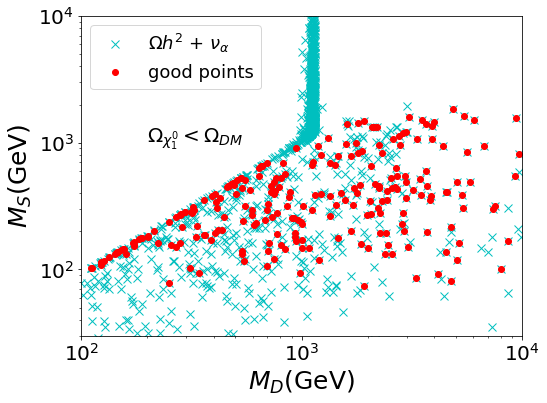

In [71]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'g1')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'cx',markersize=8,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label=r'good points')

#DM legend
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega_{DM}$', {'color': 'k', 'fontsize': 20})
#plt.text(3000, 5.0e3, r'$\Omega_{\chi^0_1} > \Omega_{DM}$', {'color': 'k', 'fontsize': 20})

#plt.grid()
#plt.title('general scan')
plt.legend(prop={'size':18},loc='upper left')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
plt.xlim(1e2,10e3)
plt.ylim(3e1,1e4)

plt.tight_layout()
plt.savefig('plots/MSvsMD.pdf')
#plt.show()

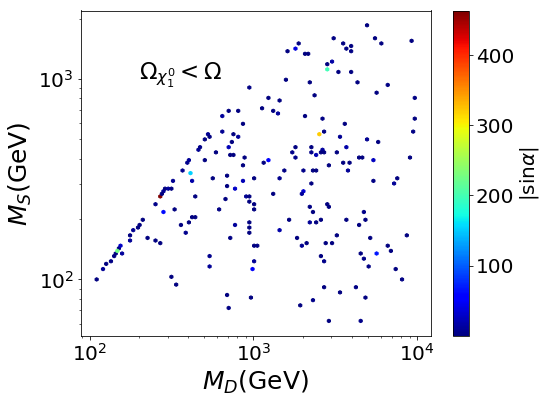

In [62]:
plt.figure(figsize=(8,6))

#plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',markersize=4,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
plt.hexbin(DI.MDF, np.abs(DI.vS*DI.YRC/np.sqrt(2)), np.abs(DI.LamSPH*DI.vS) ,xscale='log',yscale='log',gridsize=100,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$|\sin\alpha|$',size=20)

#point
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega$', {'color': 'k', 'fontsize': 23})

#plt.legend(prop={'size':20},loc='upper left')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
#plt.xlim(1e2,10e3)
#plt.ylim(3e1,1e4)

plt.tight_layout()
#plt.savefig('plots/MSvsMD.pdf')
#plt.show()

In [72]:
DI.shape

(278, 69)

The DM is singlet a to 3 TeV
Warning: I get $\Omega h^2$ even without coannihilation... (coanhilitations is only the blue linto a to 1 TeV)

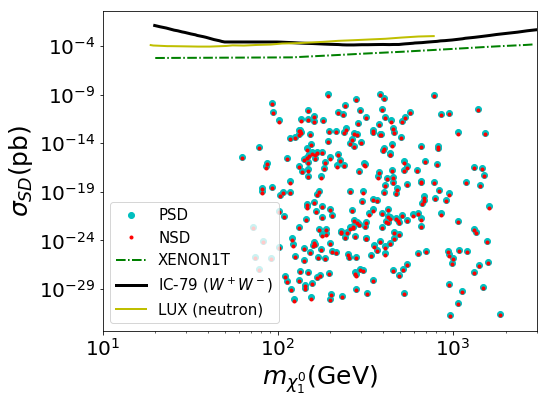

In [73]:
plt.figure(figsize=(8,6))

plt.loglog(DI.mChi1,DI['PSD'],'co')
plt.loglog(DI.mChi1,DI['NSD'],'r.')

#Prospects
n=np.arange(20,3000,100)
#plt.loglog(n,LZSD(n),'r--',lw=3,label='LZ')
plt.loglog(n,XENON1TSD(n),'g-.',lw=2,label='XENON1T')

#plt.plot(PICO2L_SD['M'],PICO2L_SD['sigmaSD']*(1E+36),'lime',lw=2,label='PICO-2L (proton)')
#plt.plot(PICO60_SD['M'],PICO60_SD['sigmaSD']*(1e+36),'y-',lw=2,label='PICO-60 (proton)')
#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=3,label=r'IC-79 ($W^+W^-$)')
#LUX
plt.plot(LUX_SD_n['M'],LUX_SD_n['sigmaSD']*(1e+36),'y',lw=2,label='LUX (neutron)')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SD}$(pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
plt.xlim(10,3e3)
#plt.ylim(1e-23,1e-1)

plt.tight_layout()

Ok. SD don not import in the model

# BR($h\to\gamma\gamma$) -> Warning

In [74]:
## Reset index to imput new data to the dataframe
DI = DI.reset_index()
del[DI['index']]

In [75]:
BRhggSM = 2.75157381E-03

DI['R1'] = DI['BRh1gg']/BRhggSM
DI['R2'] = DI['BRh2gg']/BRhggSM

In [76]:
hgg = DI[np.logical_and(DI['R1'] > 0.71, DI['R1'] < 1.52)]
#hgg = kk[np.logical_and(kk['R2'] > 0.71, kk['R2'] < 1.52)]

In [77]:
print(DI.shape, hgg.shape)

(278, 71) (278, 71)


BR$(h\to \gamma\gamma) \to$ Filter a lot of points

# Export the BP

In [74]:
## All the file
export_data = DI

In [75]:
## Reset index to imput new data to the dataframe
export_data = export_data.reset_index()
del[export_data['index']]

In [76]:
## Export the file to do analisys
export_data.to_csv('DM.csv')

In [77]:
# Read the file with the good DM data
DM = pd.read_csv('DM.csv')
del[DM['Unnamed: 0']]

In [78]:
print(DM.shape)

(254, 71)


### Running the rutine again for the good points

In [79]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

import NEUTRINO2018
import neutrino_analytic3

# Tiempo inicial
t1=time.time() 

Num = xd.shape[0]

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

Num = DM.shape[0]

for i in range(0,Num-1):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MS12 = DM.MS12[i]
    MS22 = MS12
    LamS1H = DM.LamS1H[i]
    LamS2H = DM.LamS2H[i]
    LamSPH = DM.LamSPH[i]
    #mh2 = LamSP*vS -> LamS no cero
    LamS = DM.LamS[i]
    LamSP = DM.LamSP[i]
    vS = DM.vS[i]
    YRD = DM.YRD[i]
    YRC = DM.YRC[i]
    MDF = DM.MDF[i]
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %DM.YRA11[i] 
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %DM.YRA12[i]   
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %DM.YRA13[i]    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %DM.YRA21[i]  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %DM.YRA22[i]     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %DM.YRA23[i]       
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %DM.YRB11[i]  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %DM.YRB12[i]       
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %DM.YRB13[i]   
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %DM.YRB21[i]   
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %DM.YRB22[i]      
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %DM.YRB23[i]      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
     
    ###  Run micromegas and take the relic density. 
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    #print("n=",n,"Omega=",Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])   
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])
    taumug = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[16])
    #Scalar Higgs mixing
    ZH11 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[6])
    ZH12 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[11])
    ZH21 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[16])
    ZH22 = eval(SPheno_output.split('Block SCALARMIX ')[1].split()[21])
    
    #Higgs to two photons
    if len(SPheno_output.split('BR(hh_1 -> VP VP )'))==1:
        BRh1gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split())
        BRh1gg = eval(SPheno_output.split('BR(hh_1 -> VP VP )')[0].split()[r-5])

    if len(SPheno_output.split('BR(hh_2 -> VP VP )'))==1:
        BRh2gg = 0.
    else:
        r = len(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split())
        BRh2gg = eval(SPheno_output.split('BR(hh_2 -> VP VP )')[0].split()[r-5])  
        
    #BR for relic density
    
    #Branchings x1x1uiUi
    x1x1u1U1 = mo.split('% ~Chi01 ~chi01 ->u1 U1')
    x1x1u2U2 = mo.split('% ~Chi01 ~chi01 ->u2 U2')
    x1x1u3U3 = mo.split('% ~Chi01 ~chi01 ->u3 U3')

    #Branchings x1x1diDi
    x1x1d1D1 = mo.split('% ~Chi01 ~chi01 ->d1 D1')
    x1x1d2D2 = mo.split('% ~Chi01 ~chi01 ->d2 D2')
    x1x1d3D3 = mo.split('% ~Chi01 ~chi01 ->d3 D3')

    #Branchings x1x1eiei
    x1x1e1E1 = mo.split('% ~Chi01 ~chi01 ->e1 E1')
    x1x1e2E2 = mo.split('% ~Chi01 ~chi01 ->e2 E2')
    x1x1e3E3 = mo.split('% ~Chi01 ~chi01 ->e3 E3')

    #Coannihilations
    xx2d1U1 = mo.split('% ~Cha ~chi02 ->d1 U1')
    xx2d2U2 = mo.split('% ~Cha ~chi02 ->d2 U2')
    xx2d3U3 = mo.split('% ~Cha ~chi02 ->d3 U3')

    xx2e1Nu1 = mo.split('% ~Cha ~chi02 ->e1 Nu1')
    xx2e2Nu2 = mo.split('% ~Cha ~chi02 ->e2 Nu2')
    xx2e3Nu3 = mo.split('% ~Cha ~chi02 ->e3 Nu3')

    #Others
    x1x1h1h1 = mo.split('% ~Chi01 ~chi01 ->h1 h1')
    x1x1h2h2 = mo.split('% ~Chi01 ~chi01 ->h2 h2')
    x1x1h1h2 = mo.split('% ~Chi01 ~chi01 ->h1 h2')
    x1x1gg = mo.split('% ~Chi01 ~chi01 ->g g')
    x1x1ww = mo.split('% ~Chi01 ~chi01 ->Wp Wm') 
    x1x1ZZ = mo.split('% ~Chi01 ~chi01 ->Z Z')
    xxww = mo.split('% ~Cha ~cha ->Wp Wm')
    x2x2ww = mo.split('% ~Chi02 ~chi02 ->Wp Wm')
    
    #Branchings x1x1uiUi
    if len(x1x1u1U1) == 2:
        BRx1x1du1U1 = eval(x1x1u1U1[0].split()[len(x1x1u1U1[0].split())-1])
    else:
        BRx1x1u1U1 = 0.0

    if len(x1x1u2U2) == 2:
        BRx1x1u2U2 = eval(x1x1u2U2[0].split()[len(x1x1u2U2[0].split())-1])
    else:
        BRx1x1u2U2 = 0.0

    if len(x1x1u3U3) == 2:
        BRx1x1u3U3 = eval(x1x1u3U3[0].split()[len(x1x1u3U3[0].split())-1])
    else:
        BRx1x1u3U3 = 0.0

    #Branchings x1x1diDi
    if len(x1x1d1D1) == 2:
        BRx1x1d1D1 = eval(x1x1d1D1[0].split()[len(x1x1d1D1[0].split())-1])
    else:
        BRx1x1d1D1 = 0.0

    if len(x1x1d2D2) == 2:
        BRx1x1d2D2 = eval(x1x1d2D2[0].split()[len(x1x1d2D2[0].split())-1])
    else:
        BRx1x1d2D2 = 0.0

    if len(x1x1d3D3) == 2:
        BRx1x1d3D3 = eval(x1x1d3D3[0].split()[len(x1x1d3D3[0].split())-1])
    else:
        BRx1x1d3D3 = 0.0    
    
    #Branchings x1x1eiEi
    if len(x1x1e1E1) == 2:
        BRx1x1e1E1 = eval(x1x1e1E1[0].split()[len(x1x1e1E1[0].split())-1])
    else:
        BRx1x1e1E1 = 0.0

    if len(x1x1e2E2) == 2:
        BRx1x1e2E2 = eval(x1x1e2E2[0].split()[len(x1x1e2E2[0].split())-1])
    else:
        BRx1x1e2E2 = 0.0

    if len(x1x1e3E3) == 2:
        BRx1x1e3E3 = eval(x1x1e3E3[0].split()[len(x1x1e3E3[0].split())-1])
    else:
        BRx1x1e3E3 = 0.0       

    #Branchings xx2d1Ui
    if len(xx2d1U1) == 2:
        BRxx2d1U1 = eval(xx2d1U1[0].split()[len(xx2d1U1[0].split())-1])
    else:
        BRxx2d1U1 = 0.0

    if len(xx2d2U2) == 2:
        BRxx2d2U2 = eval(xx2d2U2[0].split()[len(xx2d2U2[0].split())-1])
    else:
        BRxx2d2U2 = 0.0

    if len(xx2d3U3) == 2:
        BRxx2d3U3 = eval(xx2d3U3[0].split()[len(xx2d3U3[0].split())-1])
    else:
        BRxx2d3U3 = 0.0   

    if len(xx2e1Nu1) == 2:
        BRxx2e1Nu1 = eval(xx2e1Nu1[0].split()[len(xx2e1Nu1[0].split())-1])
    else:
        BRxx2e1Nu1 = 0.0    

    if len(xx2e2Nu2) == 2:
        BRxx2e2Nu2 = eval(xx2e2Nu2[0].split()[len(xx2e2Nu2[0].split())-1])
    else:
        BRxx2e2Nu2 = 0.0 

    if len(xx2e3Nu3) == 2:
        BRxx2e3Nu3 = eval(xx2e3Nu3[0].split()[len(xx2e3Nu3[0].split())-1])
    else:
        BRxx2e3Nu3 = 0.0 

    #Others 
    if len(x1x1h1h1) == 2:
        BRx1x1h1h1 = eval(x1x1h1h1[0].split()[len(x1x1h1h1[0].split())-1])
    else:
        BRx1x1h1h1 = 0.0 

    if len(x1x1h2h2) == 2:
        BRx1x1h2h2 = eval(x1x1h2h2[0].split()[len(x1x1h2h2[0].split())-1])
    else:
        BRx1x1h2h2 = 0.0     

    if len(x1x1h1h2) == 2:
        BRx1x1h1h2 = eval(x1x1h1h2[0].split()[len(x1x1h1h2[0].split())-1])
    else:
        BRx1x1h1h2 = 0.0           

    if len(x1x1gg) == 2:
        BRx1x1gg = eval(x1x1gg[0].split()[len(x1x1gg[0].split())-1])
    else:
        BRx1x1gg = 0.0      

    if len(x1x1ww) == 2:
        BRx1x1ww = eval(x1x1ww[0].split()[len(x1x1ww[0].split())-1])
    else:
        BRx1x1ww = 0.0    

    if len(x1x1ZZ) == 2:
        BRx1x1ZZ = eval(x1x1ZZ[0].split()[len(x1x1ZZ[0].split())-1])
    else:
        BRx1x1ZZ = 0.0    

    if len(xxww) == 2:
        BRxxww = eval(xxww[0].split()[len(xxww[0].split())-1])
    else:
        BRxxww = 0.0 

    if len(x2x2ww) == 2:
        BRx2x2ww = eval(x2x2ww[0].split()[len(x2x2ww[0].split())-1])
    else:
        BRx2x2ww = 0.0      

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,\
              mChi1,mChi2,XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg,\
              taumug,sv,ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg,BRx1x1u1U1, BRx1x1u2U2, BRx1x1u3U3,BRx1x1d1D1,\
              BRx1x1d2D2, BRx1x1d3D3,BRx1x1e1E1, BRx1x1e2E2, BRx1x1e3E3,BRxx2d1U1, BRxx2d2U2,\
              BRxx2d3U3,BRxx2e1Nu1, BRxx2e2Nu2, BRxx2e3Nu3,BRx1x1h1h1, BRx1x1h2h2, BRx1x1h1h2, BRx1x1gg,\
              BRx1x1ww, BRx1x1ZZ, BRxxww, BRx2x2ww])
    
x=np.asarray(x)
xd2=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD',\
                           'YRC','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2',\
                            'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM','Omega',\
                            'PSI','PSD','NSI','NSD','T','S','U','mueg','taumug','sv','ZH11','ZH12','ZH21',\
                            'ZH22','BRh1gg','BRh2gg','BRx1x1u1U1','BRx1x1u2U2','BRx1x1u3U3','BRx1x1d1D1',\
                            'BRx1x1d2D2', 'BRx1x1d3D3','BRx1x1e1E1', 'BRx1x1e2E2', 'BRx1x1e3E3','BRxx2d1U1',\
                            'BRxx2d2U2','BRxx2d3U3','BRxx2e1Nu1', 'BRxx2e2Nu2', 'BRxx2e3Nu3','BRx1x1h1h1',\
                            'BRx1x1h2h2', 'BRx1x1h1h2','BRx1x1gg','BRx1x1ww', 'BRx1x1ZZ', 'BRxxww', 'BRx2x2ww'])

t4=time.time() 
print ("The program spent", t4-t1, "s running",i,"times")

The program spent 1928.0933892726898 s running 252 times


In [84]:
xd2[['YRC','YRD','ZH11','ZH12','mChi1','mChi2','mCha']][:3]

,YRC,YRD,ZH11,ZH12,mChi1,mChi2,mCha
0,0.444729,0.004989,0.999776,-0.021180,146.655494,2009.229690,2009.22950
1,0.943000,0.050577,0.999995,-0.003040,136.130999,4499.940130,4499.93160
2,0.042375,0.000855,1.000000,-0.000022,381.624962,391.135293,391.13471


In [80]:
# All good points
#xd2.to_csv('DM2.csv')

In [85]:
# Read the file with the good DM data
xd2 = pd.read_csv('DM2.csv')
del[xd2['Unnamed: 0']]

In [86]:
print(DM.shape, xd2.shape)

(254, 71) (232, 70)


In [87]:
print(BRx1x1u1U1, BRx1x1u2U2, BRx1x1u3U3)
print(BRx1x1d1D1, BRx1x1d2D2, BRx1x1d3D3)
print(BRx1x1e1E1, BRx1x1e2E2, BRx1x1e3E3) 
print(BRxx2d1U1, BRxx2d2U2, BRxx2d3U3)
print(BRxx2e1Nu1, BRxx2e2Nu2, BRxx2e3Nu3)
print(BRx1x1h1h1, BRx1x1h2h2, BRx1x1h1h2, BRx1x1gg, BRx1x1ww, BRx1x1ZZ, BRxxww, BRx2x2ww)

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [88]:
#Sum
xd2['BRS'] = xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3+xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3+xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3+xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3+xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3+xd2.BRx1x1h1h1+xd2.BRx1x1h2h2+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww  

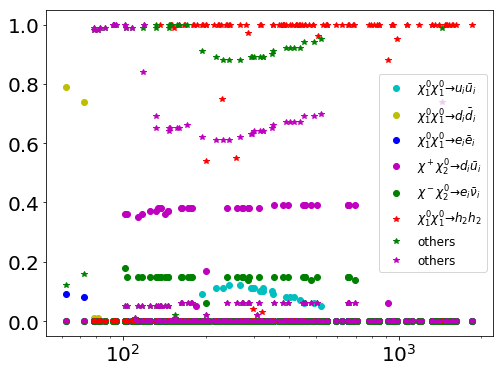

In [93]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3)/100.,'yo',label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3)/100.,'bo',label=r'$\chi_1^0\chi_1^0\to e_i\bar{e}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'mo',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'go',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

plt.semilogx(xd2.mChi1, xd2.BRx1x1h2h2/100.,'r*',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1h1h1+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww)/100.,'g*',label=r'others')
plt.semilogx(xd2.mChi1, (xd2.BRxxww+xd2.BRx2x2ww+xd2.BRx1x1ww+xd2.BRx1x1ZZ)/100.,'m*',label=r'others')
#plt.semilogx(xd2.mChi1, xd2.BRS/100.,'k*',label=r'$\Sigma$')
plt.legend(prop={'size':12},loc='best')
plt.show()

In [94]:
xd2[['BRx1x1h1h1','BRx1x1h1h2','BRx1x1h2h2','BRx1x1gg','BRx1x1ww','BRx1x1ZZ','BRxxww','BRx2x2ww']]

,BRx1x1h1h1,BRx1x1h1h2,BRx1x1h2h2,BRx1x1gg,BRx1x1ww,BRx1x1ZZ,BRxxww,BRx2x2ww
0,35.0,0.0,0.0,0.0,44.0,20.0,0.0,0.0
1,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
3,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
5,25.0,0.0,0.0,0.0,46.0,23.0,0.0,0.0
6,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
9,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0


We check that DM decay into neutrinos can gives the relic density in the early universe. It gives $100\%$ points 180 of xDM

In [114]:
mo.splitlines()

['',
 'Masses of odd sector Particles:',
 '~Chi : MChi01=   381.6 || ~Cha : MCha  =   391.1 || ~Chi : MChi02=   391.1 ',
 '~Ssc : MSsc1 =  1621.1 || ~Ssc : MSsc2 =  1621.1 || ',
 'Xf=2.72e+01 Omega h^2=1.18e-01',
 '',
 '# Channels which contribute to 1/(omega) more than 1%.',
 '# Relative contributions in % are displayed',
 '   13% ~Cha ~chi02 ->d1 U1 ',
 '   13% ~Cha ~chi02 ->d2 U2 ',
 '   13% ~Cha ~chi02 ->d3 U3 ',
 '    5% ~Cha ~chi02 ->e1 Nu1 ',
 '    5% ~Cha ~chi02 ->e2 Nu2 ',
 '    5% ~Cha ~chi02 ->e3 Nu3 ',
 '    3% ~Cha ~cha ->Wp Wm ',
 '    3% ~Chi02 ~chi02 ->Wp Wm ',
 '    2% ~Cha ~cha ->u1 U1 ',
 '    2% ~Cha ~cha ->u2 U2 ',
 '    2% ~Chi02 ~chi02 ->d1 D1 ',
 '    2% ~Chi02 ~chi02 ->d2 D2 ',
 '    2% ~Chi02 ~chi02 ->d3 D3 ',
 '    2% ~Cha ~cha ->u3 U3 ',
 '    2% ~Cha ~chi02 ->A Wm ',
 '    2% ~Cha ~chi02 ->Z Wm ',
 '    2% ~Chi02 ~chi02 ->Z Z ',
 '    2% ~Chi02 ~chi02 ->u1 U1 ',
 '    2% ~Chi02 ~chi02 ->u2 U2 ',
 '    1% ~Cha ~cha ->d1 D1 ',
 '    1% ~Cha ~cha ->d2 D2 ',
 '

In [95]:
#h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >80, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)> 20)]
h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >80, 1>0)]

In [96]:
print(xd2.shape[0], h2.shape[0])

232 88


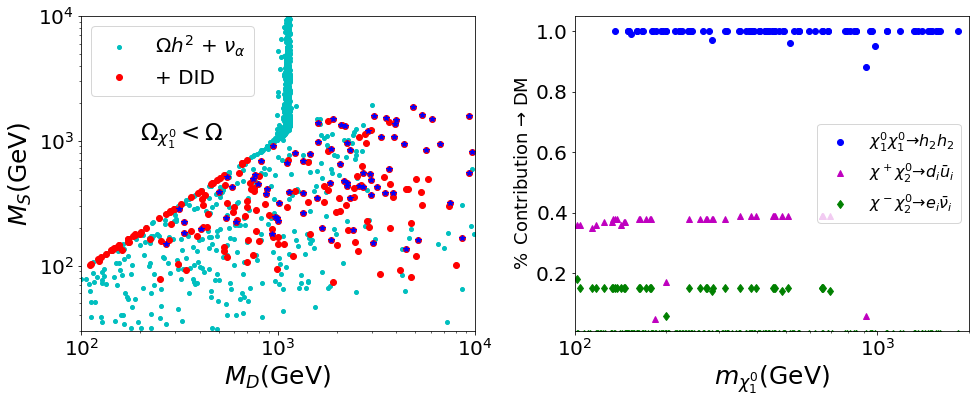

In [97]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'co',markersize=4,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
plt.loglog(DI.MDF, DI.vS*DI.YRC/np.sqrt(2),'ro',label=r'+ DID')
plt.loglog(h2.MDF, h2.vS*h2.YRC/np.sqrt(2),'b*',label=r'')

#point
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega$', {'color': 'k', 'fontsize': 23})

#plt.grid()
#plt.title('general scan')
plt.legend(prop={'size':20},loc='upper left')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
plt.xlim(1e2,10e3)
plt.ylim(3e1,1e4)

plt.subplot(122)

plt.semilogx(h2.mChi1, h2.BRx1x1h2h2/100.,'bo',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'m^',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'gd',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

#plt.grid()
plt.legend(prop={'size':16},loc='best')
plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=25)
plt.ylabel(r'$\%\,$ Contribution $\to$ DM',size=18)
plt.xlim(1e2,2e3)
plt.ylim(0.01,1.05)

plt.tight_layout()
plt.show()

In [98]:
DI[np.logical_and(DI.MDF<400., DI.vS*DI.YRC/np.sqrt(2) <110)]

,MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,...,mn3,cxxh1,cxxh2,mr,PSI_scalar,PSI_vector,Xenon1T_SI,Dwarfs_bb_sv,R1,R2
25,110.503827,3.145720e+08,3.145720e+08,0.082126,0.082126,0.000185,0.000000,0.788607,172.863282,0.000949,...,5.036793e-11,5.727976e-04,0.588825,0.929701,3.671936e-13,1.191660e-12,9.300961e-11,1.972590e-26,1.032570,0.406486
94,342.125747,3.278644e+08,3.278644e+08,0.000158,0.000158,0.000707,0.000203,0.087868,650.304010,-0.000144,...,5.062233e-11,7.454811e-04,0.142887,0.928891,4.493791e-13,1.675357e-21,8.600414e-11,1.821523e-26,1.030006,0.000000
131,312.014858,2.597318e+06,2.597318e+06,0.010051,0.010051,0.000274,0.582778,0.008676,2281.278902,0.000004,...,4.943732e-11,2.323136e-04,0.044804,0.929735,3.926510e-14,1.069846e-27,9.337296e-11,1.979693e-26,1.030218,0.000000
218,123.379629,3.855784e+07,3.855784e+07,0.002455,0.002455,0.003321,0.004778,0.198531,16271.303369,-0.000004,...,4.944187e-11,1.687191e-06,0.006701,0.930265,1.146777e-18,8.133506e-23,9.932183e-11,2.096100e-26,1.032361,0.000000
222,112.343538,3.038171e+07,3.038171e+07,0.000196,0.000196,0.000148,1.629885,0.730965,16992.374090,0.000012,...,5.053861e-11,1.687665e-08,0.006095,0.929846,1.145398e-22,2.493210e-20,9.455555e-11,2.002818e-26,1.032532,0.000000
234,251.647479,1.431207e+06,1.431207e+06,0.000733,0.000733,0.001559,0.000108,0.117723,482.011600,0.001098,...,5.006475e-11,2.546199e-03,0.162767,0.927183,6.388581e-12,2.209819e-17,7.427144e-11,1.576121e-26,1.030732,0.000000


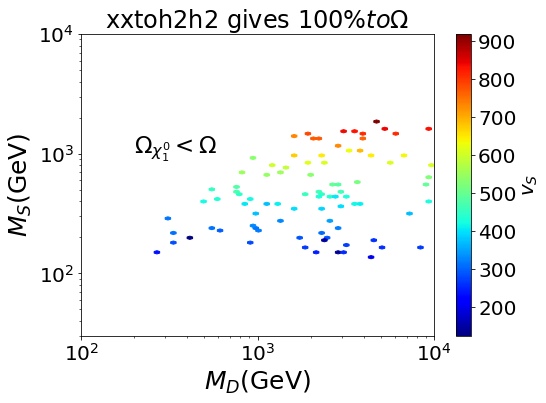

In [99]:
plt.figure(figsize=(8,6))

#plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'c.',markersize=4,label=r'$\Omega h^2$ + $\nu_\alpha$ ')
#plt.hexbin(DI.MDF, np.abs(DI.vS*DI.YRC/np.sqrt(2)), np.abs(DI.vS) ,xscale='log',yscale='log',gridsize=100,label='',cmap='jet' )
plt.hexbin(h2.MDF, np.abs(h2.vS*h2.YRC/np.sqrt(2)), np.abs(h2.vS) ,xscale='log',yscale='log',gridsize=50,label='',cmap='jet' )
a=plt.colorbar()
a.set_label(r'$v_S$',size=20)

#point
plt.text(200, 1.0e3, r'$\Omega_{\chi^0_1} < \Omega$', {'color': 'k', 'fontsize': 23})

plt.title('xxtoh2h2 gives $100\% to \Omega$')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_S$(GeV)',size=25)
plt.xlim(1e2,10e3)
plt.ylim(3e1,1e4)

plt.tight_layout()
#plt.savefig('plots/MSvsMD.pdf')
#plt.show()

# improving the scan -> kk

In [100]:
kk = DI

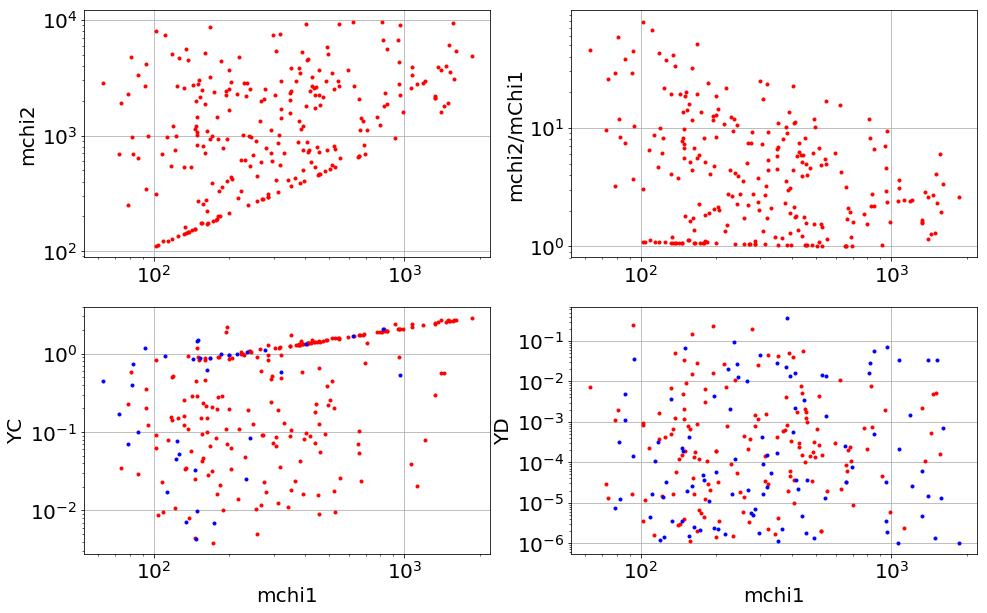

In [101]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.mChi2/kk.mChi1, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2/mChi1')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRC, 'r.')
plt.loglog(kk.mChi1, -kk.YRC, 'b.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YC')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRD, 'r.')
plt.loglog(kk.mChi1, -kk.YRD, 'b.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YD')

plt.show()

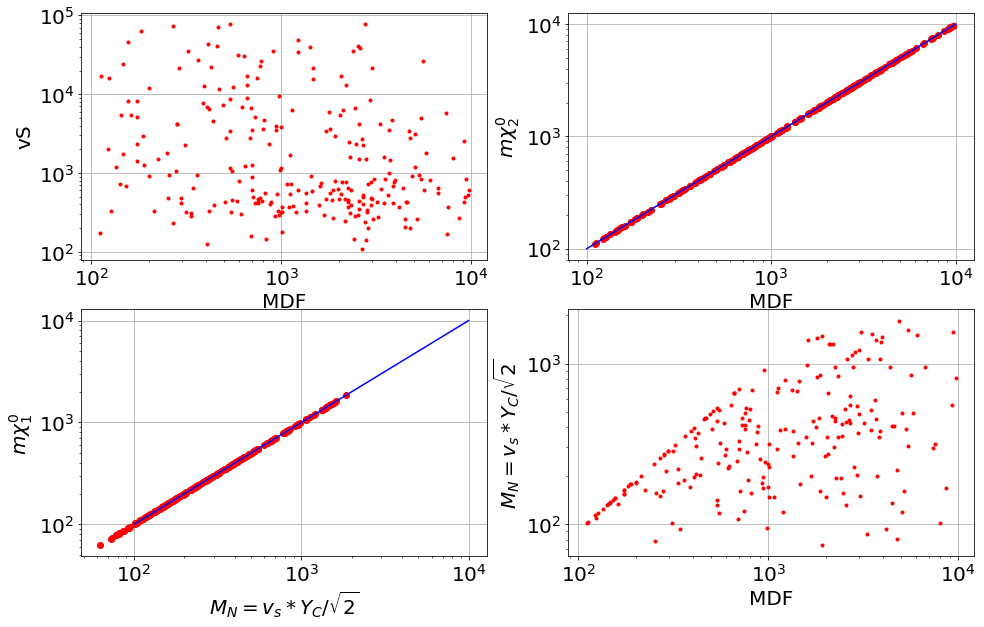

In [102]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.MDF, kk.vS, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('vS')

plt.subplot(222)
plt.loglog(kk.MDF, kk.mChi2, 'ro')
plt.grid()
plt.xlabel('MDF')
plt.ylabel(r'$m\chi_2^0$')
m = np.linspace(1e2,1e4,20)
plt.plot(m, m, 'b-')

plt.subplot(223)
plt.loglog(kk.vS*np.abs(kk.YRC)/np.sqrt(2), kk.mChi1, 'ro')
plt.plot(m, m, 'b-')
plt.grid()
plt.xlabel(r'$M_N = v_s*Y_C/\sqrt{2}$')
plt.ylabel(r'$m\chi_1^0$')

plt.subplot(224)
plt.loglog(kk.MDF,kk.vS*kk.YRC/np.sqrt(2), 'r.')
plt.grid()
plt.ylabel(r'$M_N = v_s*Y_C/\sqrt{2}$')
plt.xlabel('MDF')

plt.show()

DM is singlet a to 3 TeV... The Doublet peack is excluded

Low mixing in the neutral fermion sector

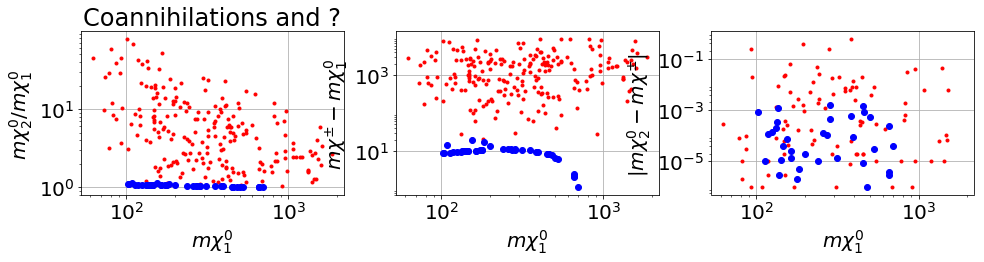

In [103]:
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.loglog(kk.mChi1, kk.mChi2/kk.mChi1, 'r.')
plt.loglog(coan.mChi1, coan.mChi2/coan.mChi1, 'bo')
plt.grid()
plt.title('Coannihilations and ?')
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$m\chi_2^0/m\chi_1^0$ ')

plt.subplot(132)
plt.loglog(kk.mChi1, kk.mCha-kk.mChi1, 'r.')
plt.loglog(coan.mChi1, coan.mCha-coan.mChi1, 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$m\chi^{\pm}-m\chi_1^0$ ')

plt.subplot(133)
plt.loglog(kk.mChi1, np.abs(kk.mChi2-kk.mCha), 'r.')
plt.loglog(coan.mChi1, np.abs(coan.mChi2-coan.mCha), 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'$|m\chi_2^0-m\chi^{\pm}|$ ')

plt.show()

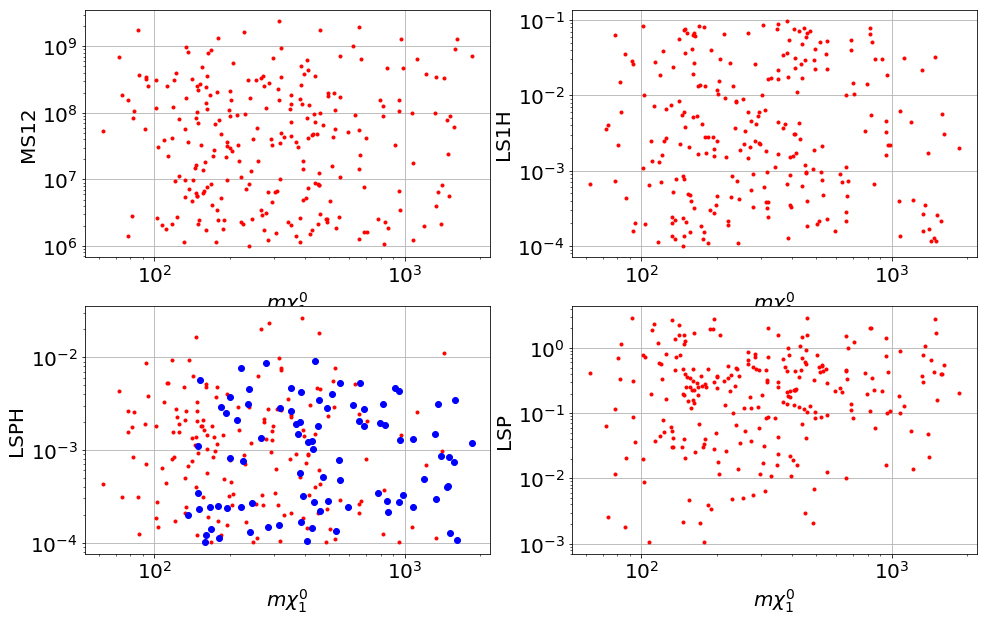

In [104]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.MS12, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'MS12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.LamS1H, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LS1H')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.LamSPH, 'r.')
plt.loglog(h2.mChi1, h2.LamSPH, 'bo')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSPH')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.LamSP, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSP')

plt.show()

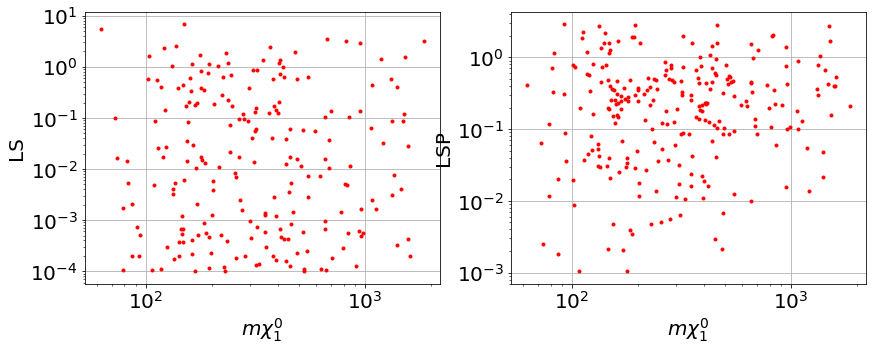

In [105]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.loglog(kk.mChi1, kk.LamS, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LS')

plt.subplot(1,2,2)
plt.loglog(kk.mChi1, kk.LamSP, 'r.')
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'LSP')
plt.show()

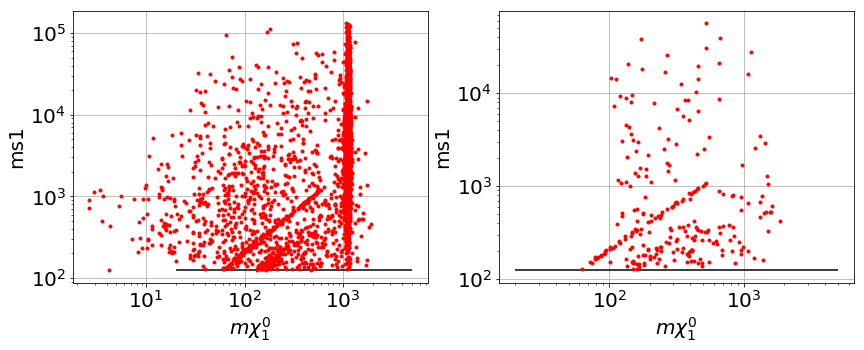

In [106]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.loglog(xd.mChi1, xd.mh2, 'r.')
plt.hlines(125,20,5e3)
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'ms1')


plt.subplot(1,2,2)
plt.loglog(kk.mChi1, kk.mh2, 'r.')
plt.hlines(125,20,5e3)
plt.grid()
plt.xlabel(r'$m\chi_1^0$')
plt.ylabel(r'ms1')
plt.show()

# $Ya_{si}$ -> Random

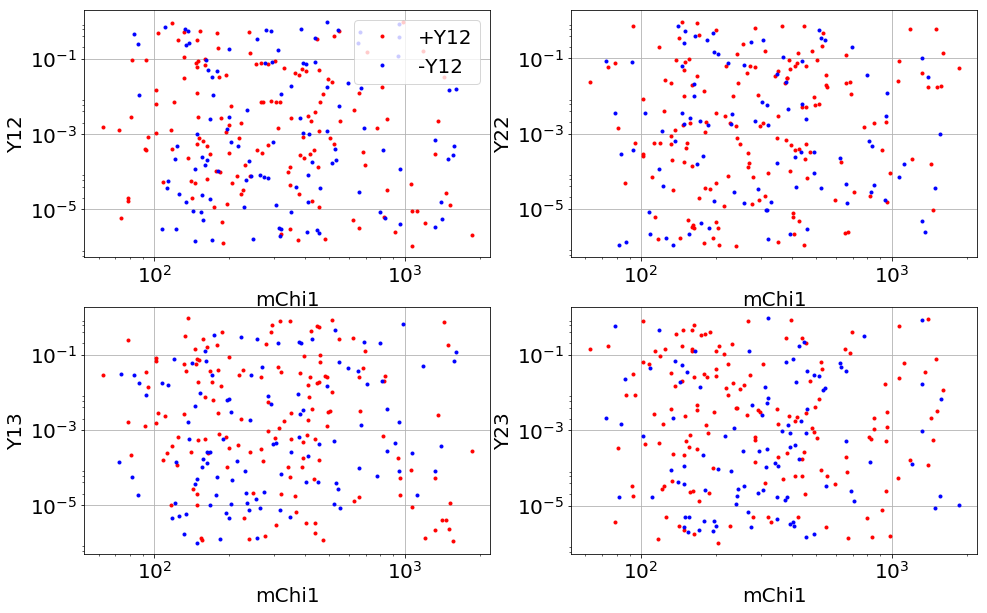

In [107]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.YRA12, 'r.',label='+Y12')
plt.loglog(kk.mChi1, -kk.YRA12, 'b.',label='-Y12')
plt.grid()
plt.legend()
plt.xlabel('mChi1')
plt.ylabel(r'Y12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.YRA22, 'r.')
plt.loglog(kk.mChi1, -kk.YRA22, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y22')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRA13, 'r.')
plt.loglog(kk.mChi1, -kk.YRA13, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y13')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRA23, 'r.')
plt.loglog(kk.mChi1, -kk.YRA23, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y23')

plt.show()

# $Yb_{si}$

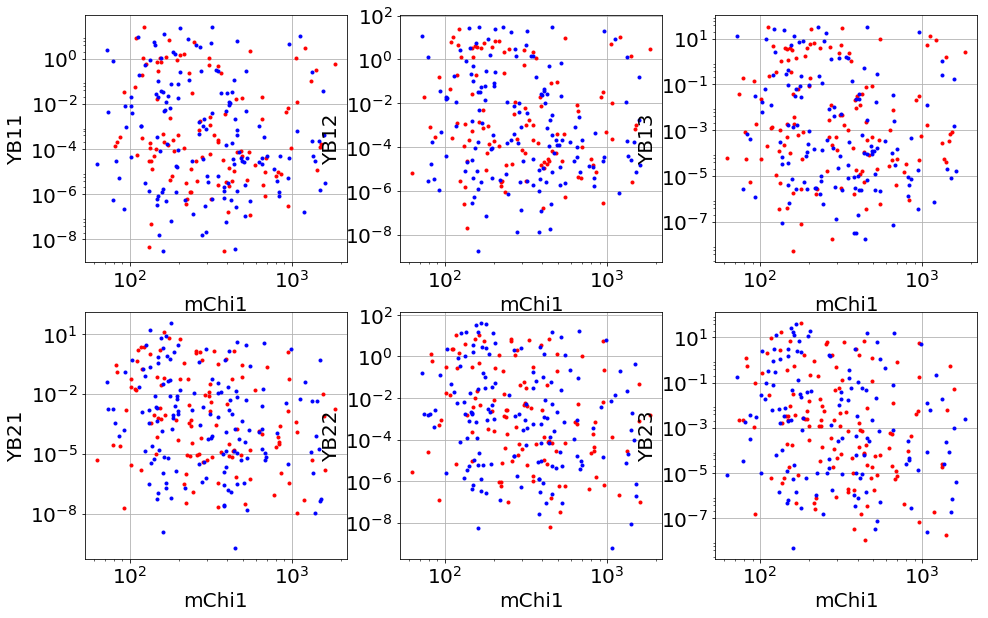

In [108]:
plt.figure(figsize=(16,10))

plt.subplot(231)
plt.loglog(kk.mChi1, kk.YRB11, 'r.')
plt.loglog(kk.mChi1,-kk.YRB11, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB11')

plt.subplot(232)
plt.loglog(kk.mChi1, kk.YRB12, 'r.')
plt.loglog(kk.mChi1,-kk.YRB12, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB12')

plt.subplot(233)
plt.loglog(kk.mChi1, kk.YRB13, 'r.')
plt.loglog(kk.mChi1,-kk.YRB13, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB13')

plt.subplot(234)
plt.loglog(kk.mChi1, kk.YRB21, 'r.')
plt.loglog(kk.mChi1,-kk.YRB21, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB21')

plt.subplot(235)
plt.loglog(kk.mChi1, kk.YRB22, 'r.')
plt.loglog(kk.mChi1,-kk.YRB22, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB22')

plt.subplot(236)
plt.loglog(kk.mChi1, kk.YRB23, 'r.')
plt.loglog(kk.mChi1,-kk.YRB23, 'b.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB23')

plt.show()

In [109]:
kk[['XV11', 'XV12', 'XV21', 'XV22', 'XU11', 'XU12', 'XU21', 'XU22', 'PSD', 'NSD', 'T', 'S', 'U', 'taumug',
       'ZH11', 'ZH12', 'ZH21', 'ZH22', 'BRh1gg', 'BRh2gg']][:3]

,XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,PSD,NSD,T,S,U,taumug,ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg
0,0.000032,-1.00000,1.00000,0.000032,0.000432,-1.000000,1.000000,0.000432,3.485000e-16,2.665000e-16,4.311444e-05,3.321801e-05,0.000018,3.864122e-16,0.999776,-0.021180,0.021180,0.999776,0.002824,0.00000
1,0.000059,-1.00000,1.00000,0.000059,0.001948,-0.999998,0.999998,0.001948,1.449000e-13,1.108000e-13,8.168806e-08,3.810084e-07,0.000004,7.594030e-20,0.999995,-0.003040,0.003040,0.999995,0.002818,0.00238
2,0.007685,-0.99997,0.99997,0.007685,0.007877,-0.999969,0.999969,0.007877,9.033000e-14,6.907000e-14,2.850952e-10,6.585444e-09,0.000520,3.390285e-19,1.000000,-0.000022,0.000022,1.000000,0.002833,0.00000


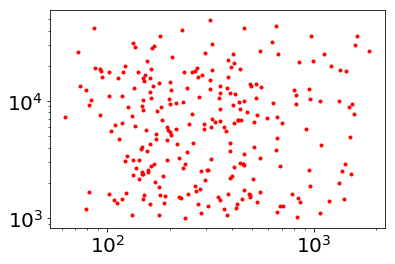

In [110]:
plt.loglog(DI.mChi1,DI.mS2, 'r.')